# Microcanonical ensemble - distinguishable particles
Authors: Livia Maskos, Professor Bart Hoogenboom

Outline:

- generate an animation with all possible configurations of a microcanonical ensemble for distinguisable particles (variables: lattice sites, particles)
- for a given 2D lattice: create plot (number of configurations against number of particles)
!!! next steps: animation coming + need to find a way of changing the for huge 'for' loop containing all the 'if', with the ability of changing the particles' color + create a box to ask for number of particles and lattice sites. Code becomes very long for 3+ particles considered.

Imports

In [50]:
!conda install -y -q ffmpeg

Solving environment: ...working... done

# All requested packages already installed.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import itertools
import matplotlib.animation as animation
from IPython.core.display import HTML
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display

In [2]:
a = widgets.IntSlider(
    value=2,
    min=2,
    max=5,
    step=1,
    description='lattice side',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(a)
#lat = a.value
#print(lat)

b = widgets.IntSlider(
    value=2,
    min=1,
    max=4,
    step=1,
    description='# particles',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(b)
#N = b.value
#print(N)

IntSlider(value=2, continuous_update=False, description='lattice side', max=5, min=2)

IntSlider(value=2, continuous_update=False, description='# particles', max=4, min=1)

In [6]:
lat = a.value # saves the chosen values
N = b.value
M1 = lat - 1 # considering the 0 point
M = lat**2 # number of lattice sites
xi = [*range(0,M1+1)] #possible x coordinates
yi = [*range(0,M1+1)] #possible y coordinates

points = [*itertools.product(xi,yi)] #possible point coordinates

print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))

#particles considered and their coordinates 
particles = [*range(0, N, 1)]
index = 0
while index < N:
    particles[index] = points
    index = index + 1

#possible configurations of the system
config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]

configurations=[]
for elem in config:
    l = list(elem)
    configurations.append(l)

# total number of configurations
totalnum = len(configurations)
print('The total number of configurations is',totalnum)

We consider 2 particles in a 3 x 3 lattice
The total number of configurations is 72


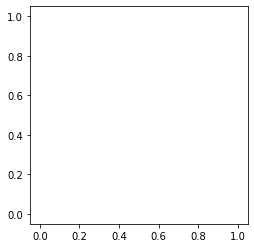

In [7]:
fig, ax = plt.subplots()
plt.axis('scaled')
        
def animate(frame):
    ax.clear()
    ax.set_xlim(-0.5, M1+0.5)
    ax.set_ylim(-0.5, M1+0.5)
    start = -0.5
    stop = M1+0.5
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax.axvline(x=xc, color='red')
        ax.axhline(y=xc, color='red')
    elem = configurations[frame]
    colo = ['r', 'g', 'b','k']
    i = 0
    for t in elem:
        circle = plt.Circle((t[0], t[1]) ,0.1 , color=colo[i])
        ax.add_patch(circle)
        i =+1

In [8]:
animation1 = animation.FuncAnimation(fig, animate, interval=500, frames=totalnum)
HTML(animation1.to_html5_video())

[1, 2]
4
12
[1, 2]
[4, 12]


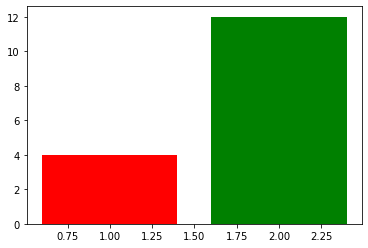

In [6]:
def configurations_generator(N):
    xi = [*range(0,M1+1)] #possible x coordinates
    yi = [*range(0,M1+1)] #possible y coordinates
    points = [*itertools.product(xi,yi)] #possible point coordinates
    #print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))
    #particles considered and their coordinates
    particles = [*range(0, N, 1)]
    index = 0
    while index < N:
        particles[index] = points
        index = index + 1
    config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]
    configurations=[]
    for elem in config:
        l = list(elem)
        configurations.append(l)
    totalnum = len(configurations)
    print(totalnum)
    newp.append(totalnum)

#def maketheplot(N):
    #colo = ['r', 'g', 'b','k']
    #i = 0
    #for N in graph:
       #plt.bar(N, newp, color=colo[i])
       #plt.show
       #i =+1
    
   
graph = [*range(1,3)]
print(graph)
newp=[]

'''def pap():
    for N in graph:
        configurations_generator(N)
        maketheplot(N)
    print(graph)
    print(newp)'''

def pap():
    colo = ['r', 'g', 'b','k']
    i = 0
    for N in graph:
        configurations_generator(N)
        plt.bar(N, newp, color=colo[i])
        plt.show
        i =+1
    print(graph)
    print(newp)
pap()

4
12
[1, 2]
[4, 12]


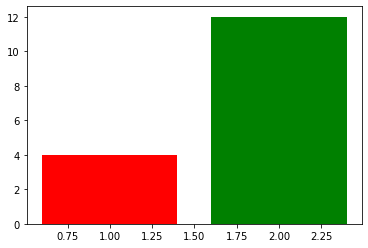

9
72
[1, 2]
[9, 72]


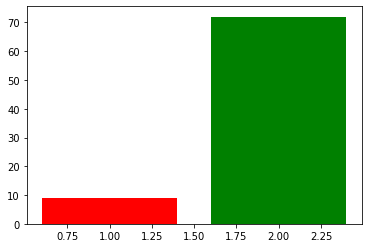

16
240
[1, 2]
[16, 240]


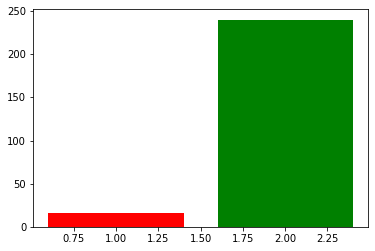

25
600
[1, 2]
[25, 600]


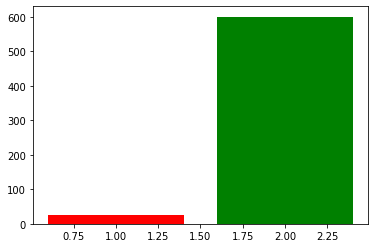

In [7]:
qw = [*range(1,5)]
plt.figure()


for M1 in qw:
    newp.clear()
    pap()
    plt.show()

25
600
13800
[1, 2, 3]
[25, 600, 13800]
25
600
13800
[1, 2, 3]
[25, 600, 13800]
25
600
13800
[1, 2, 3]
[25, 600, 13800]
25
600
13800
[1, 2, 3]
[25, 600, 13800]


25
600
13800
[1, 2, 3]
[25, 600, 13800]


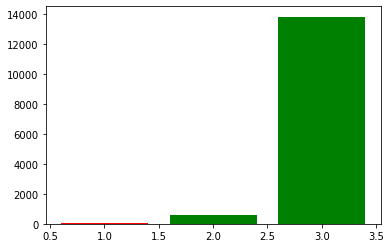

In [40]:
qw = [*range(1,5)]
fig, ax = plt.subplots()
        
def animate(frame):
    ax.clear()
    M1 = qw[frame]
    newp.clear()
    pap()
    
animation2 = animation.FuncAnimation(fig, animate, interval=500, frames=3)
HTML(animation2.to_html5_video())

[1, 2, 3, 4]
9
72
504
3024
[1, 2, 3, 4]
[9, 72, 504, 3024]


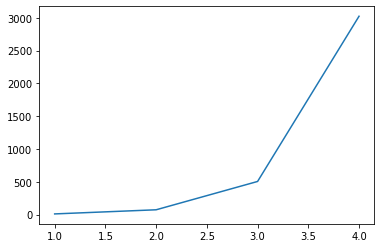

In [9]:
def configurations_generator(N):
    xi = [*range(0,M1+1)] #possible x coordinates
    yi = [*range(0,M1+1)] #possible y coordinates
    points = [*itertools.product(xi,yi)] #possible point coordinates
    #print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))
    #particles considered and their coordinates
    particles = [*range(0, N, 1)]
    index = 0
    while index < N:
        particles[index] = points
        index = index + 1
    config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]
    configurations=[]
    for elem in config:
        l = list(elem)
        configurations.append(l)
    totalnum = len(configurations)
    print(totalnum)
    newp.append(totalnum)

def maketheplot(N):
    plt.plot(graph, newp)
    plt.show
   
graph = [*range(1,5)]
print(graph)
newp=[]

def pap():
    for N in graph:
        configurations_generator(N)
    print(graph)
    print(newp)
    maketheplot(N)
pap()

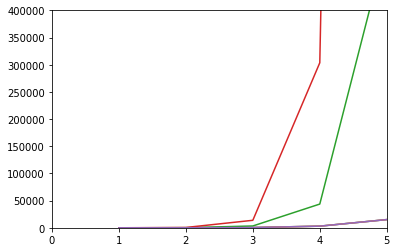

In [52]:
qw = [*range(2,5)]
graph = [*range(1,6)]
#print(qw)
#print(graph)
fig, ax = plt.subplots()

def animate(frame):
    #ax.clear()
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 400000)
    M1 = qw[frame]
    lat = M1 +1
    newp.clear()
    for N in graph:
        #newp(N) = []
        #print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))            
        xi = [*range(0,M1+1)] #possible x coordinates            
        yi = [*range(0,M1+1)] #possible y coordinates
        points = [*itertools.product(xi,yi)] #possible point coordinates
        #print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))
        #particles considered and their coordinates
        particles = [*range(0, N, 1)]
        index = 0
        while index < N:
            particles[index] = points
            index = index + 1
        config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]
        configurations=[]
        for elem in config:
            l = list(elem)
            configurations.append(l)
        totalnum = len(configurations)
        #print(totalnum)
        newp.append(totalnum)
    #print(newp)
    maketheplot(N)

animation2 = animation.FuncAnimation(fig, animate, interval=1000, frames=len(qw))
HTML(animation2.to_html5_video())

qw = [*range(1,5)]
for M1 in qw:
    newp.clear()
    pap()
    
    plt.show()

M1 = 2
for N in graph:
    #lat = qw - 1
    configurations_generator(N)
    print(totalnum)
    print(newp)
    maketheplot(N)
plt.show()

fig, ax = plt.subplots()
#plt.axis('scaled')

qw = [*range(1,5)]
for M1 in qw:
    for N in graph:
        #lat = qw - 1
        configurations_generator(N)
        print(newp)
        maketheplot(N)
    plt.show()
    

M1 = [*range(1,5)]
for lat in M1:
    #print(lat)
    configurations_generator(2)

    

In [25]:
!conda install -y -q ffmpeg

Solving environment: ...working... done

# All requested packages already installed.



In [42]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import itertools
import matplotlib.animation as animation
from IPython.core.display import HTML
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

Set up

In [43]:
from IPython.display import display

def f(latticeside): # choose the lattice size
    display(latticeside)
    return latticeside

a = interactive(f, latticeside=widgets.IntSlider(min=2, max=6)) # creates an interactive input
type(a)
a.children
display(a)

def part(Num_particles): # choose the number of particles
    display(Num_particles)
    return Num_particles

b = interactive(part, Num_particles=widgets.IntSlider(min=1, max=4))
type(b)

b.children
display(b)

interactive(children=(IntSlider(value=2, description='latticeside', max=6, min=2), Output()), _dom_classes=('w…

interactive(children=(IntSlider(value=1, description='Num_particles', max=4, min=1), Output()), _dom_classes=(…

In [44]:
a.kwargs
lat = a.result
M1 = lat - 1 # considering the 0 point
M = lat**2 # number of lattice sites

b.kwargs
N = b.result
print('We consider %s'% N, 'particles on a %d x %d'%(lat,lat), 'lattice')

We consider 2 particles on a 2 x 2 lattice


### Generating the points coordinates on a 2D lattice (x and y)

In [47]:
xi = [*range(0,M1+1)] #possible x coordinates
yi = [*range(0,M1+1)] #possible y coordinates
points = [*itertools.product(xi,yi)] #possible point coordinates

particles = [*range(0, N, 1)] #particles considered and their coordinates 
index = 0
while index < N:
    particles[index] = points
    index = index + 1

#possible configurations of the system

config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]
#print(config)

In [48]:
#test = []
#for elem in config:
    #lew = list(elem)

In [49]:
configurations=[]
for elem in config:
    l = list(elem)
    configurations.append(l)
print(configurations)

TypeError: 'list' object is not callable

In [29]:
totalnum = len(configurations) # total number of configurations
print('The total number of configurations is',totalnum)

The total number of configurations is 0


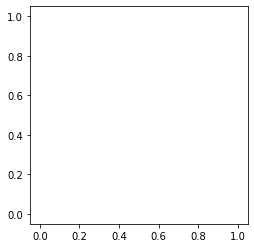

In [101]:
fig, ax = plt.subplots()
plt.axis('scaled')
        
def animate(frame):
    ax.clear()
    ax.set_xlim(-0.5, M1+0.5)
    ax.set_ylim(-0.5, M1+0.5)
    start = -0.5
    stop = M1+0.5
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax.axvline(x=xc, color='red')
        ax.axhline(y=xc, color='red')
    elem = configurations[frame]
    colo = ['r', 'g', 'b','k']
    i = 0
    for t in elem:
        circle = plt.Circle((t[0], t[1]) ,0.1 , color=colo[i])
        ax.add_patch(circle)
        i =+1

In [102]:
animation1 = animation.FuncAnimation(fig, animate, interval=500, frames=totalnum)
HTML(animation1.to_html5_video())

In [44]:
listforplot=[]
listforplot.append(totalnum)
print(listforplot)

[72]


!!!!need to store previous number of configurations to get a list and then plot

In [17]:
def configurationsss(N):
    xi = [*range(0,M1+1)] #possible x coordinates
    yi = [*range(0,M1+1)] #possible y coordinates
    points = [*itertools.product(xi,yi)] #possible point coordinates
    particles = [*range(0, N, 1)] #particles considered and their coordinates 
    index = 0
    while index < N:
        particles[index] = points
        index = index + 1
    config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]
    configurations=[]
    for elem in config:
        l = list(elem)
        configurations.append(l)
    totalnum = len(configurations)
    print(totalnum)
# total number of configurations
#print(configurations)

In [18]:
configurationsss(2)

TypeError: 'list' object is not callable

In [ ]:
graph = [*range(1,3)]
print(graph)

for N in graph:
    configurations(N)

In [6]:
# 2 by 2 lattice
num = [4, 12, 24, 24]

# 3 by 3 lattice
num9 = [9, 72, 504, 3024, 15120, 60480]
numpart = [1, 2, 3, 4, 5, 6]
plt.plot(numpart, num9)
plt.ylim(0,7000000)
(0, 7000000)

[1, 2, 3, 4, 5]


(0, 7000000)

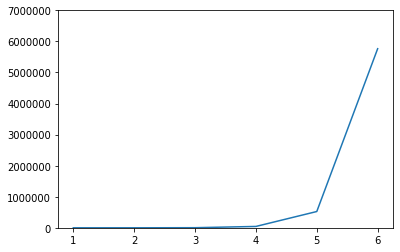

In [46]:
# 4 by 4 lattice
num16 = [16, 240, 3360, 43680, 524160, 5765760]
plt.plot(numpart, num16)
plt.ylim(0,7000000)
(0, 7000000)

(0, 7000000)

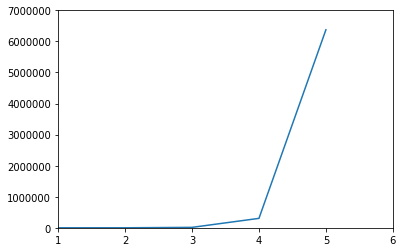

In [47]:
# 5 by 5 lattice
num25 = [25, 600, 13800, 303600, 6375600]
n = [1, 2, 3, 4, 5]
plt.plot(n, num25)
plt.xlim(1,6)
plt.ylim(0,7000000)
(0, 7000000)

In [40]:
xi = [*range(0,M1+1)] #possible x coordinates
yi = [*range(0,M1+1)] #possible y coordinates
points = [*itertools.product(xi,yi)] #possible point coordinates

#particles considered and their coordinates 
particles = [*range(0, N, 1)]
index = 0
while index < N:
    particles[index] = points
    index = index + 1


#possible configurations of the system
config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]

configurations=[]
for elem in config:
    l = list(elem)
    configurations.append(l)
print(configurations)

# total number of configurations
totalnum = len(configurations)
print('The total number of configurations is',totalnum)

TypeError: 'list' object is not callable

In [11]:
import ipywidgets as widgets
from IPython.display import display

w = widgets.Dropdown(
    options=['Addition', 'Multiplication', 'Subtraction'],
    value='Addition',
    description='Task:',
)

##def on_change(change):
    #print("changed to %s" % change['new'])

display(w)

Dropdown(description='Task:', options=('Addition', 'Multiplication', 'Subtraction'), value='Addition')

In [ ]:
a = widgets.Dropdown(
    options=['1', '2', '3','4','5'],
    value='2',
    description='# particles :',
    disabled=False,
)
display(a)

b = widgets.Dropdown(
    options=['2', '3', '4','5'],
    value='2',
    description='lattice side :',
    disabled=False,
)
display(b)

a.kwargs
N = a.result
b.kwargs
lat = b.result
print(N)
print(lat)
print('We consider %s'% N)


#3.def maketheplot():
    #plt.bar(graph, newp, color='r')
    #plt.show
#1.def maketheplot():
   # plt.bar(graph, newp)
    #plt.show
'''def maketheplot(N):
    plt.plot(graph, newp)
    plt.show'''

In [ ]:
'''for M1 in qw:
    newp.clear()
    pap()
    plt.show()''' #code working!!

'''def animate(frame):
    M1 = qw[frame]
    #ax.clear()
    #newp.clear()
    #M1 = qw[frame]
    for M1 in qw:
        newp.clear()
        pap()
    plt.show()#pap()
    #plt.show()'''

'''def animate(frame):
    M1 = qw[frame]
    for M1 in qw:
        for N in graph:
            configurations_generator(N)
        print(graph)
        print(newp)
        maketheplot(N)'''
'''def animate(frame):
    #ax.clear()
    M1 = qw[frame]
    lat = M1 +1
    for M1 in qw:
        newp.clear()
        for N in graph:
            #newp(N) = []
            print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))            
            xi = [*range(0,M1+1)] #possible x coordinates
            yi = [*range(0,M1+1)] #possible y coordinates
            points = [*itertools.product(xi,yi)] #possible point coordinates
            #print('We consider %d particles in a %d x %d lattice' %(N,lat, lat))
            #particles considered and their coordinates
            particles = [*range(0, N, 1)]
            index = 0
            while index < N:
                particles[index] = points
                index = index + 1
            config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]
            configurations=[]
            for elem in config:
                l = list(elem)
                configurations.append(l)
            totalnum = len(configurations)
            print(totalnum)
            newp.append(totalnum)
        print(newp)
        maketheplot(N)''' #WORKING!!!!!!!